# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [7]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/brianwetzel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# Read your api key environment variable
load_dotenv("../../api_keys/api_keys.env")
api_key = os.getenv("news_api")

In [9]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [10]:
# Fetch the Bitcoin news articles
btc_head = newsapi.get_everything(q="Bitcoin", language="en")
print(f"Number of articles about Bitcoin: {btc_head['totalResults']}")

Number of articles about Bitcoin: 7229


In [11]:
# Fetch the Ethereum news articles
eth_head = newsapi.get_everything(q="Ethereum", language="en")
print(f"Number of articles about Ethereum: {eth_head['totalResults']}")

Number of articles about Ethereum: 3079


In [14]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for article in btc_head["articles"]:
    try: 
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiment.append({
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiment)

cols = ["Compound", "Positive", "Negative", "Neutral", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.4019,0.000,0.078,0.922,"Image source, AFP via Getty Images\r\nImage ca..."
1,0.0000,0.000,0.000,1.000,The plant opening northeast of Niagara Falls t...
2,0.5106,0.099,0.000,0.901,"Earlier this year, Nothing released a pair of ..."
3,0.0000,0.000,0.000,1.000,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -..."
4,0.5859,0.142,0.000,0.858,Dec 23 (Reuters) - The U.S. Securities and Exc...


In [15]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []

for article in eth_head["articles"]:
    try: 
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiment)

cols = ["Compound", "Positive", "Negative", "Neutral", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.000,1.000,More than $1.2 million has already been spent ...
1,0.6542,0.178,0.000,0.822,Ethereum has been on a tear this year. Its out...
2,-0.0516,0.074,0.079,0.847,Blockchain startup MonoX Finance said on Wedne...
3,-0.1531,0.000,0.045,0.955,"On Monday, Budweiser joined the non-fungible t..."
4,0.5106,0.099,0.000,0.901,"Earlier this year, Nothing released a pair of ..."


In [16]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.086085,0.044750,0.020700,0.934500
std,0.327388,0.062301,0.032892,0.065407
min,-0.401900,0.000000,0.000000,0.791000
25%,-0.006450,0.000000,0.000000,0.891000
50%,0.000000,0.000000,0.000000,0.930500
75%,0.471750,0.102250,0.056750,1.000000
max,0.585900,0.158000,0.080000,1.000000


In [17]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.170450,0.060950,0.025450,0.913550
std,0.293212,0.055076,0.041952,0.075034
min,-0.584900,0.000000,0.000000,0.729000
25%,0.000000,0.000000,0.000000,0.872500
50%,0.176350,0.072000,0.000000,0.923500
75%,0.386825,0.084750,0.052500,0.967750
max,0.654200,0.178000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest score of 0.060950 

Q: Which coin had the highest compound score?

A: Ethereum has the highest score of 0.170450

Q. Which coin had the highest positive score?

A: Ethereum has the highest score of 0.178000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [19]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'also', 'char', 'reuters', 'ha', 'beer', 'ear', 'earbuds'}

In [20]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [21]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df['Text'].apply(tokenizer)
btc_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.4019,0.000,0.078,0.922,"Image source, AFP via Getty Images\r\nImage ca...","[image, source, afp, via, getty, imagesimage, ..."
1,0.0000,0.000,0.000,1.000,The plant opening northeast of Niagara Falls t...,"[plant, opening, northeast, niagara, falls, mo..."
2,0.5106,0.099,0.000,0.901,"Earlier this year, Nothing released a pair of ...","[earlier, year, nothing, released, pair, relat..."
3,0.0000,0.000,0.000,1.000,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...","[mizata, el, salvadorlondon, nov, el, salvador..."
4,0.5859,0.142,0.000,0.858,Dec 23 (Reuters) - The U.S. Securities and Exc...,"[dec, us, securities, exchange, commission, ve..."


In [22]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.Text.apply(tokenizer)
eth_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.000,1.000,More than $1.2 million has already been spent ...,"[million, already, spent, gas, feesone, remain..."
1,0.6542,0.178,0.000,0.822,Ethereum has been on a tear this year. Its out...,"[ethereum, tear, year, outperformed, bitcoin, ..."
2,-0.0516,0.074,0.079,0.847,Blockchain startup MonoX Finance said on Wedne...,"[blockchain, startup, monox, finance, wednesda..."
3,-0.1531,0.000,0.045,0.955,"On Monday, Budweiser joined the non-fungible t...","[monday, budweiser, joined, nonfungible, token..."
4,0.5106,0.099,0.000,0.901,"Earlier this year, Nothing released a pair of ...","[earlier, year, nothing, released, pair, relat..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Create function to count bigrams

def bigram_counter(doc): 
    processed = tokenizer(doc)
    bigrams = ngrams(processed, n=2)
    top_20 = dict(Counter(bigrams).most_common(20))
    return pd.DataFrame(list(top_20.items()), columns=['bigram', 'count'])


In [25]:
# Generate the Bitcoin N-grams where N=2
bitcoin_str = str(list(btc_df["tokens"]))
bigram_counter(bitcoin_str)

,bigram,count
0,"(twitter, account)",3
1,"(computer, scientist)",3
2,"(scientist, claimed)",3
3,"(claimed, inventor)",3
4,"(inventor, bitcoin)",3
5,"(bitcoin, largely)",3
6,"(largely, prevailed)",3
7,"(florida, jury)",3
8,"(jury, trial)",3
9,"(trial, whether)",3


In [26]:
# Generate the Ethereum N-grams where N=2
ethereum_str = str(list(eth_df["tokens"]))
bigram_counter(ethereum_str)

,bigram,count
0,"(earlier, year)",2
1,"(white, castle)",2
2,"(decentralized, finance)",2
3,"(illustration, taken)",2
4,"(million, already)",1
5,"(already, spent)",1
6,"(spent, gas)",1
7,"(gas, feesone)",1
8,"(feesone, remaining)",1
9,"(remaining, copy)",1


In [27]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_processed = tokenizer(bitcoin_str)
print(dict(token_count(bitcoin_processed, 10)))

{'bitcoin': 17, 'world': 6, 'cryptocurrency': 6, 'posted': 5, 'twitter': 4, 'billion': 4, 'week': 4, 'account': 3, 'project': 3, 'el': 3}


In [29]:
# Use token_count to get the top 10 words for Ethereum
ethereum_processed = tokenizer(ethereum_str)
print(dict(token_count(ethereum_processed, 10)))

{'bitcoin': 7, 'year': 5, 'ethereum': 4, 'million': 3, 'finance': 3, 'digital': 3, 'company': 3, 'white': 3, 'word': 3, 'people': 2}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

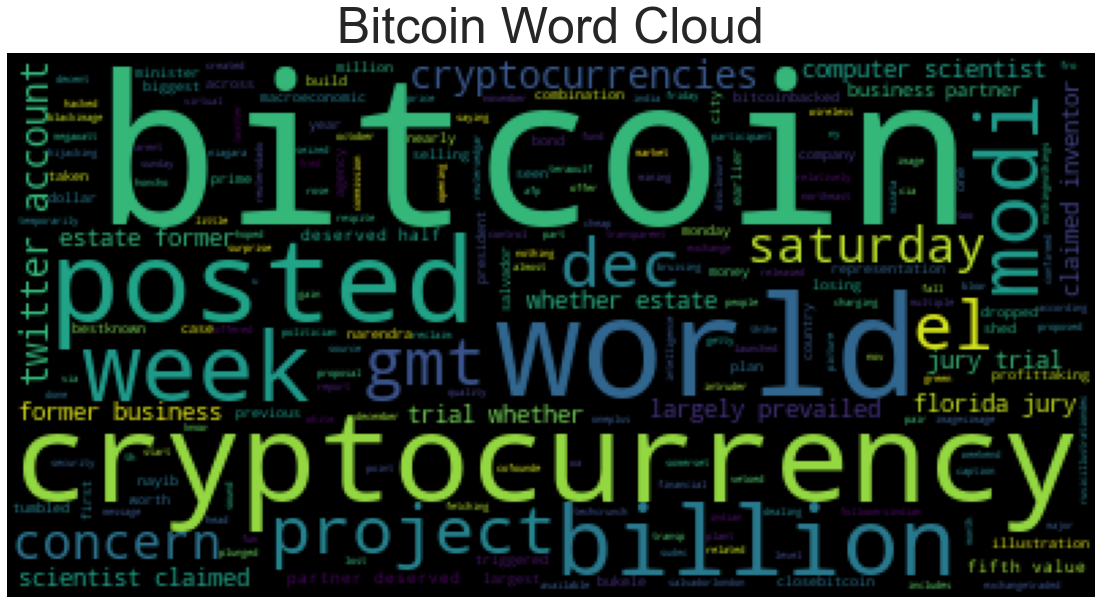

In [31]:
# Generate the Bitcoin word cloud
bitcoin_wc_str = ' '.join(bitcoin_processed)
bitcoin_wc = WordCloud().generate(bitcoin_wc_str)
plt.imshow(bitcoin_wc)
plt.axis("off")
plt.title("Bitcoin Word Cloud", fontsize = 50)
plt.show()

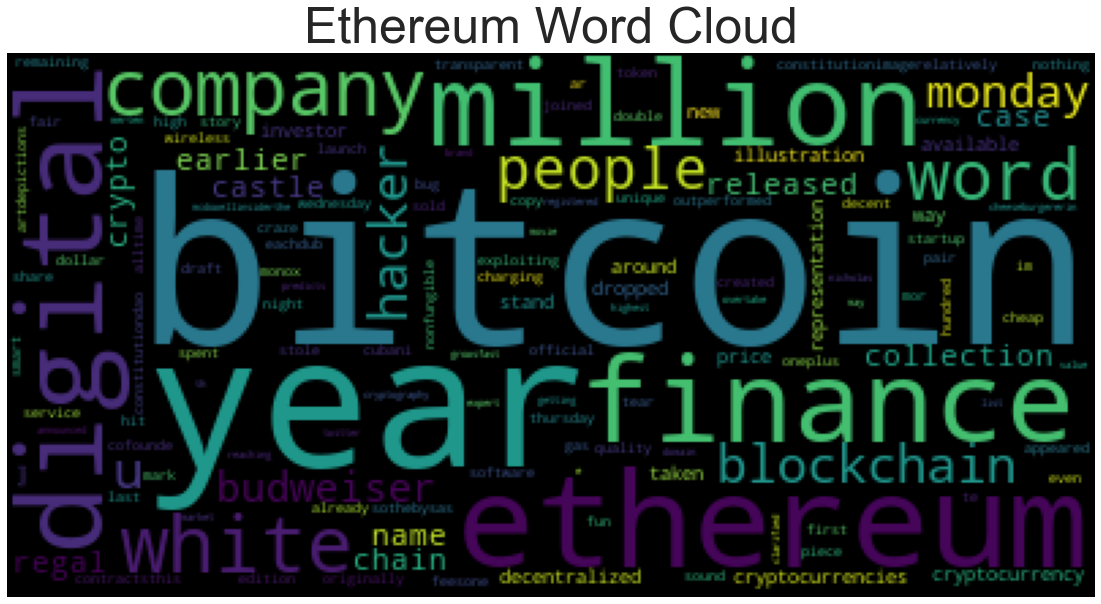

In [32]:
# Generate the Ethereum word cloud
ethereum_wc_str = ' '.join(ethereum_processed)
ethereum_wc = WordCloud().generate(ethereum_wc_str)
plt.imshow(ethereum_wc)
plt.axis("off")
plt.title("Ethereum Word Cloud", fontsize = 50)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy

In [34]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [35]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [36]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_df['Text'])
btc_content

'Image source, AFP via Getty Images\r\nImage caption, Modi has has more than 70 million Twitter followers\r\nIndian Prime Minister Narendra Modi\'s Twitter account was hacked with a message saying India ha… [+854 chars] The plant opening northeast of Niagara Falls this month, in Somerset, N.Y., is part of a $550 million project by Terawulf, a Bitcoin mining company. The project also includes a proposed 150-megawatt … [+1514 chars] Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireless charging and decent sound quality. Now, the company (created by OnePlus cofounde… [+1395 chars] MIZATA, El Salvador/LONDON, Nov 22 (Reuters) - El Salvador plans to build the world\'s first "Bitcoin City" with money from a $1 billion bitcoin-backed bond the country\'s President Nayib Bukele said o… [+3147 chars] Dec 23 (Reuters) - The U.S. Securities and Exchange Commission vetoed two proposals to offer bitcoin exchange-traded funds, dealing a

In [37]:
# Run the NER processor on all of the text
doc = nlp(btc_content)

# Add a title to the document
doc.user_data['title'] = "Bitcoin NER"


In [38]:
# Render the visualization
displacy.render(doc, style='ent')


In [39]:
# List all Entities
for entity in doc.ents:
    print('{} {}'.format(entity.text, entity.label_))

AFP ORG
Getty Images ORG
Modi GPE
more than 70 million MONEY
Twitter PRODUCT
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
India GPE
Niagara Falls PERSON
this month DATE
Somerset GPE
N.Y. GPE
$550 million MONEY
Terawulf DATE
150-megawatt QUANTITY
Earlier this year DATE
99 MONEY
OnePlus ORG
El Salvador/ GPE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City GPE
$1 billion MONEY
Nayib Bukele PERSON
Dec 23 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
two CARDINAL
Twitter PRODUCT
TechCrunch ORG
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
+1087 CARDINAL
November 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationDec PERSON
12 CARDINAL
Reuters ORG
Sunday DATE
above $50,000 MONEY
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
Reuters ORG
Monday DATE
Florida GPE
half CARDINAL
Reuters ORG
8.4% PERCENT
49,228.82 MONEY
20:01 CARDINAL
Saturday DATE
4,514.87 MONEY
Bitcoin PERSON
28.7% PERCENT
fifth ORDINAL
Saturday DA

---

### Ethereum NER

In [40]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_df['Text'])
eth_content

'More than $1.2 million has already been spent on gas fees\r\nOne of 13 remaining copies of the Official Edition of the Constitution.\r\nImage: Sothebys\r\nAs of last Thursday night, ConstitutionDAO found i… [+5262 chars] Ethereum has been on a tear this year. Its outperformed bitcoin this year and has hit an all-time high. Ethereum has even won over people like Mark Cuban.\r\nI have my fair share of bitcoin, but Im mor… [+10978 chars] Blockchain startup MonoX Finance said on Wednesday that a hacker stole $31 million by exploiting a bug in software the service uses to draft smart contracts.\r\nThis story originally appeared on Ars Te… [+4372 chars] On Monday, Budweiser joined the non-fungible token craze with the launch of its first collection of unique pieces of digital art\xa0\xa0depictions of beer cans that sold for hundreds of dollars each.\xa0\r\nDub… [+1512 chars] Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireles

In [41]:
# Run the NER processor on all of the text
doc = nlp(eth_content)

# Add a title to the document
doc.user_data['title'] = "Ethereum NER"


In [42]:
# Render the visualization
displacy.render(doc, style='ent')


In [43]:
# List all Entities
for entity in doc.ents:
    print('{} {}'.format(entity.text, entity.label_))

More than $1.2 million MONEY
One CARDINAL
13 CARDINAL
the Official Edition of the WORK_OF_ART
Constitution LAW
Sothebys GPE
last Thursday TIME
night TIME
ConstitutionDAO PERSON
this year DATE
this year DATE
Mark Cuban PERSON
Wednesday DATE
$31 million MONEY
Ars Te ORG
Monday DATE
Budweiser ORG
first ORDINAL
hundreds of dollars MONEY
Earlier this year DATE
99 MONEY
OnePlus ORG
Erin McDowell/Insider PERSON
White Castle FAC
Twitter PRODUCT
Nicholas Merten PERSON
May 2018 DATE
Shutterstock ORG
Regal Cinemas PERSON
more than 500 CARDINAL
dozens CARDINAL
Google ORG
Search GPE
2021 DATE
Squid Game ORG
year-long DATE
Xboxs ORG
Halo Infinite ORG
MicroStrategy ORG
Michael SaylorJoe Raedle/Getty Images PERSON
ETF ORG
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
DeFi GPE
Ethereum ORG
DeFi GPE
The U.S. Captioning Company ORG
the British Institute of Verbatim Reporters ORG
Bitcoin PERSON
Saturday DATE
the weekend DATE
$196 million MONEY
Bitmar GPE
Bi

---